In [1]:
import pandas as pd

In [2]:
qvals = pd.read_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/caqtls_lcl/Q.val.txt", sep="\t", header=None, names=["peakid", "qval"])

In [3]:
data_atac = pd.read_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/caqtls_lcl/ATAC/summary.mean.variant_scores_new.tsv", sep="\t", header=0)
data_atac[['Chrx', 'Posx', 'REF', 'ALT', 'Peak_id', 'obs_scores']] = data_atac['rsid'].str.split("_", expand=True)
data_atac["obs_scores"] = data_atac["obs_scores"].astype(float)

In [4]:
data_dnase = pd.read_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/caqtls_lcl/DNASE/summary.mean.variant_scores_new.tsv", sep="\t", header=0)
data_dnase[['Chrx', 'Posx', 'REF', 'ALT', 'Peak_id', 'obs_scores']] = data_dnase['rsid'].str.split("_", expand=True)
data_dnase["obs_scores"] = data_dnase["obs_scores"].astype(float)

In [5]:
data_dnase

,chr,pos,allele1,allele2,rsid,logfc.mean,abs_logfc.mean,abs_logfc.mean.pval,jsd.mean,jsd.mean.pval,...,jsd_x_max_percentile.mean,jsd_x_max_percentile.mean.pval,abs_logfc_x_jsd_x_max_percentile.mean,abs_logfc_x_jsd_x_max_percentile.mean.pval,Chrx,Posx,REF,ALT,Peak_id,obs_scores
0,chr1,737085,C,T,chr1_737085_C_T_Peak1_0.354078,0.000142,0.007233,0.733012,0.008449,0.719859,...,0.000083,0.841927,5.572939e-07,0.856193,chr1,737085,C,T,Peak1,0.354078
1,chr1,943968,C,T,chr1_943968_C_T_Peak2_0.622845,-0.017014,0.017014,0.502553,0.007952,0.774001,...,0.000381,0.651133,7.187384e-06,0.589354,chr1,943968,C,T,Peak2,0.622845
2,chr1,903245,A,G,chr1_903245_A_G_Peak3_0.40672,0.000167,0.007436,0.720347,0.009937,0.585051,...,0.001553,0.374878,9.803388e-06,0.535688,chr1,903245,A,G,Peak3,0.406720
3,chr1,962891,C,T,chr1_962891_C_T_Peak4_0.353125,0.004548,0.013109,0.635580,0.012462,0.384286,...,0.001568,0.354380,2.739344e-05,0.479473,chr1,962891,C,T,Peak4,0.353125
4,chr1,1128331,G,T,chr1_1128331_G_T_Peak5_0.366329,0.011660,0.011660,0.614298,0.009721,0.601515,...,0.000034,0.926467,3.218158e-07,0.889515,chr1,1128331,G,T,Peak5,0.366329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107836,chr22,50888623,T,A,chr22_50888623_T_A_Peak107837_0.364291,-0.010486,0.012367,0.602716,0.009335,0.620908,...,0.002007,0.298815,2.694631e-05,0.403624,chr22,50888623,T,A,Peak107837,0.364291
107837,chr22,51177257,C,T,chr22_51177257_C_T_Peak107838_0.419677,0.002544,0.004343,0.848117,0.007114,0.847013,...,0.000482,0.608092,8.083460e-07,0.829284,chr22,51177257,C,T,Peak107838,0.419677
107838,chr22,50594835,A,G,chr22_50594835_A_G_Peak107839_0.619781,0.009103,0.010954,0.627138,0.006453,0.918352,...,0.000684,0.516497,8.223820e-06,0.560449,chr22,50594835,A,G,Peak107839,0.619781
107839,chr22,50353917,C,G,chr22_50353917_C_G_Peak107840_0.385831,-0.010752,0.019599,0.488854,0.014500,0.283594,...,0.013751,0.026802,3.010006e-04,0.129143,chr22,50353917,C,G,Peak107840,0.385831


In [6]:
sig_peaks = open("/mnt/lab_data2/anusri/variant-scorer/src/output/caqtls_lcl/pid.fdr10.txt").readlines()
sig_peaks_ids = [line.strip() for line in sig_peaks]
sig_peaks_ids = qvals[qvals["qval"]<0.1]["peakid"].values

In [7]:
data_dnase_sig = data_dnase[data_dnase["Peak_id"].isin(sig_peaks_ids)].drop_duplicates()
data_atac_sig = data_atac[data_atac["Peak_id"].isin(sig_peaks_ids)].drop_duplicates()
#data_dnase_sig = data_dnase_sig[data_dnase_sig["peak_overlap"]]
#data_atac_sig = data_atac_sig[data_atac_sig["peak_overlap"]]

In [8]:
print(len(sig_peaks_ids))

2707


In [9]:
data_dnase_sig.shape


(2707, 26)

In [10]:
import matplotlib.pyplot as plt

In [11]:
data_atac_sig.columns                                                                                                                          

Index(['chr', 'pos', 'allele1', 'allele2', 'rsid', 'logfc.mean',
       'abs_logfc.mean', 'abs_logfc.mean.pval', 'jsd.mean', 'jsd.mean.pval',
       'logfc_x_jsd.mean', 'abs_logfc_x_jsd.mean', 'abs_logfc_x_jsd.mean.pval',
       'logfc_x_max_percentile.mean', 'abs_logfc_x_max_percentile.mean',
       'abs_logfc_x_max_percentile.mean.pval', 'jsd_x_max_percentile.mean',
       'jsd_x_max_percentile.mean.pval',
       'abs_logfc_x_jsd_x_max_percentile.mean',
       'abs_logfc_x_jsd_x_max_percentile.mean.pval', 'Chrx', 'Posx', 'REF',
       'ALT', 'Peak_id', 'obs_scores'],
      dtype='object')

In [14]:
import numpy as np
data_atac_sig["jsd_sign.mean"] = data_atac_sig["jsd.mean"]*np.sign(data_atac_sig["logfc.mean"])
       

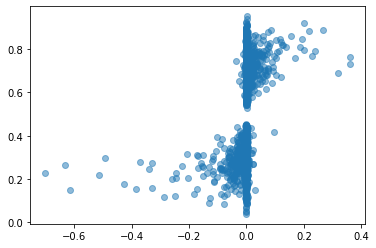

In [12]:
plt.scatter(data_atac_sig["logfc_x_jsd.mean"], data_atac_sig["obs_scores"], alpha=0.5)

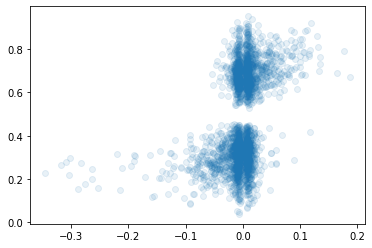

In [25]:
plt.scatter(data_atac_sig["jsd_sign.mean"], data_atac_sig["obs_scores"], alpha=0.1)

In [17]:
import scipy.stats

print(scipy.stats.pearsonr(data_atac_sig['obs_scores'],data_atac_sig['abs_logfc_x_jsd_x_max_percentile.mean']))

(-0.03014559908424015, 0.11686422647093589)


In [18]:
print(scipy.stats.pearsonr(data_atac_sig['obs_scores'],data_atac_sig['logfc_x_jsd.mean']))


(0.2811877545943154, 2.257738745972026e-50)


In [24]:
import scipy.stats

print(scipy.stats.pearsonr(data_atac_sig['obs_scores'],data_atac_sig['jsd_sign.mean']))

(0.3730024279092575, 4.126979535936469e-90)


In [23]:
#print(scipy.stats.pearsonr(data_atac_sig[data_atac_sig["peak_overlap"]]['obs_scores'],data_atac_sig[data_atac_sig["peak_overlap"]]['logfc_x_jsd_x_max_percentile.mean']))



In [20]:
#print(scipy.stats.pearsonr(data_atac_sig[data_atac_sig["peak_overlap"]]['obs_scores'],data_atac_sig[data_atac_sig["peak_overlap"]]['jsd_sign.mean']))


In [21]:
#plt.scatter(data_atac_sig[data_atac_sig["peak_overlap"]]["logfc_x_jsd_x_max_percentile.mean"], data_atac_sig[data_atac_sig["peak_overlap"]]["obs_scores"]-0.5, alpha=0.5)

In [22]:
#plt.scatter(data_atac_sig[data_atac_sig["peak_overlap"]]["jsd_sign.mean"], data_atac_sig[data_atac_sig["peak_overlap"]]["obs_scores"]-0.5, alpha=0.5)



156

In [94]:
data_atac_sig = data_atac[data_atac["Peak_id"].isin(sig_peaks_ids)].drop_duplicates()
data_atac_nonsig = data_atac[~data_atac["Peak_id"].isin(sig_peaks_ids)].drop_duplicates()
data_atac_sig["obs_scores"] = data_atac_sig["obs_scores"].astype(float)
data_atac_nonsig["obs_scores"] = data_atac_nonsig["obs_scores"].astype(float)

In [95]:
print(np.mean(data_atac_sig['obs_scores']))
print(np.mean(data_atac_nonsig['obs_scores']))


0.4763933590690797
0.4718914237544454


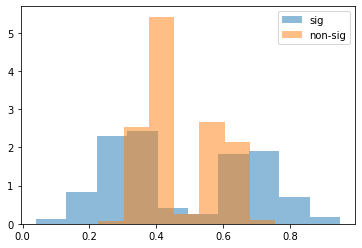

In [96]:
plt.hist(data_atac_sig['obs_scores'], density=True, alpha=0.5, label="sig")
plt.hist(data_atac_nonsig['obs_scores'],density=True, alpha=0.5, label="non-sig")
plt.legend()